<a href="https://colab.research.google.com/github/JhonnyLimachi/Sigmoidal/blob/main/31_Feature_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Feature Scaling

Nesta fase do curso, você provavelmente já teve vários insights de que variáveis em escalas diferentes podem impactar o seu modelo.

Termos como padronização, normalização, mesma escala e magnitude são muito importantes para o cientista de dados. Dependendo do algoritmo que você escolher, o resultado pode ser muito prejudicado.

<center><img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/magnitude.jpeg" width="40%"></center>

A realidade é que sim, na esmagadora maioria das vezes, você vai lidar com variáveis de diferentes tipos e diferentes escalas. Aprofundar no tema dessa aula é importante. No entanto, não se limite apenas a este notebook ou àquilo que foi mencionado no vídeo. **Use as referências e links!**
<center><img src="https://images.unsplash.com/photo-1604247416063-e0e6aaf47b0b?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="40%"></center>

**Quando usar técnicas de feature scaling?**

Resumidamente, você vai procurar usar feature scaling quando estiver trabalhando com algoritmos baseados em **gradient descent** ou algoritmos baseados em **distância**.

Algoritmos baseados em gradiente atualizam seus parâmetros individualmente. Ou seja, escalas diferentes irão fazer muita diferença.

Da mesma maneira, algoritmos baseados em distância usam a distância entre pontos (dados) para estabelecer o grau de similaridade. Magnitudes extremas irão fazer com que o algoritmo privilegie algumas features desde o seu primeiro contato com elas.

**E os algoritmos baseados em árvores?**

Algoritmos baseados em árvores são insensíveis às diferentes escalas das features. Isso é devido ao fato que ele cria nós de decisão baseando-se unicamente em cada feature isoladamente.

## Padronização

Padronização é quando as features sofrem uma mudança de escala, e passa a ter as propriedades de uma distribuição normal com média $\mu = 0$ e desvio padrão $\sigma = 1$.

Na padronização, os z-scores são calculados da seguinte maneira:

$$
z = \frac{x - \mu}{\sigma}
$$

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/wine_data.csv", header=None)
df = df.iloc[:,0:3].copy()
df.columns = ['Label', 'Alcohol', 'MalicAcid'
]

df.head()

,Label,Alcohol,MalicAcid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


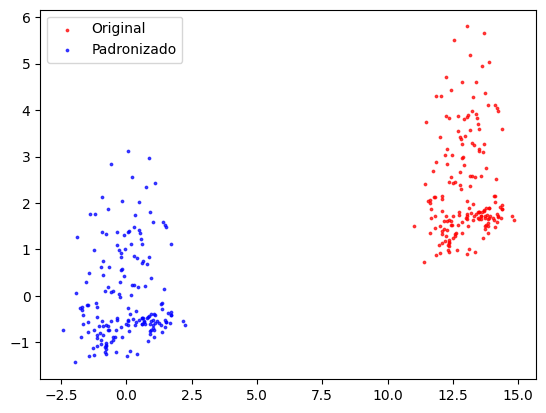

In [2]:
# padronização
std = StandardScaler().fit_transform(df[['Alcohol', 'MalicAcid']])

# plotar
fig, ax = plt.subplots()
ax.scatter('Alcohol', 'MalicAcid', c='red', s=3, label='Original', alpha=.7, data=df)
ax.scatter(std[:,0], std[:,1], c='blue', s=3, label='Padronizado', alpha=.7)
plt.legend(loc='upper left')
plt.show()

## Normalização

Basicamente, a normalização coloca os dados dentro de uma escala $[0, 1]$. Apesar de não ser a única forma de normalização, utiliza-se mais frequentemente o `Min-Max scaling`, que é calculado da seguinte maneira:

$$
X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

In [ ]:
# padronização
minmax = MinMaxScaler().fit_transform(df[['Alcohol', 'MalicAcid']])

# plotar
fig, ax = plt.subplots()
ax.scatter('Alcohol', 'MalicAcid', c='red', s=3, label='Original', alpha=.7, data=df)
ax.scatter(std[:,0], std[:,1], c='blue', s=3, label='Padronizado', alpha=.7)
ax.scatter(minmax[:,0], minmax[:,1], c='green', s=3, label='Normalizado', alpha=.7)
plt.legend(loc='upper left')
plt.show()